# San Francisco Airport Passenger Analysis
##### Author: Dana Perry
##### Last Edit Made: August 9, 2024

#### Goal: Analyze the monthly passenger statistics at San Francisco International Airport (SFO) to produce business recomendations.  
* Data: The [Air Traffic Passenger Statistics data](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg/about_data) is gathered from DataSF's Open Data portal. The data dictionary is here: [pdf download](https://data.sfgov.org/api/views/rkru-6vcg/files/30489964-1207-4ee7-802c-e9069504b8eb?download=true&filename=DataSF%20Data%20Dictionary%20for%20Air%20Traffic%20Passenger%20Statistics.pdf). 
* Audience: Anyone interested in the operations at SFO, as well as general aviation/transport enthusiasts 
* Purpose: Explore and visualize the most popular routes,airline, and geographic regions that are connect by SFO. 
* Business Application: Airlines can view their __current and historical operations at SFO__ and see __which air traffic markets are increasing/decreasing in popularity__ they can use this insight to determine __where it may be profitable to add/increase flight routes or upgrade plane size__. 

In [467]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading in Data 

In [417]:
sfo_df = pd.read_csv('Air_Traffic_Passenger_Statistics_20240808.csv')
sfo_df.head(3)

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM


## Exploratory Data Analysis (EDA)

I first want to explore the shape, data types, and NaN/NULL values of the dataframe, and clean it up where necessary. 

In [418]:
sfo_df.dtypes

Activity Period                 int64
Activity Period Start Date     object
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
data_as_of                     object
data_loaded_at                 object
dtype: object

In [419]:
sfo_df.shape

(36165, 15)

In [420]:
sfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              36165 non-null  int64 
 1   Activity Period Start Date   36165 non-null  object
 2   Operating Airline            36165 non-null  object
 3   Operating Airline IATA Code  35849 non-null  object
 4   Published Airline            36165 non-null  object
 5   Published Airline IATA Code  35849 non-null  object
 6   GEO Summary                  36165 non-null  object
 7   GEO Region                   36165 non-null  object
 8   Activity Type Code           36165 non-null  object
 9   Price Category Code          36165 non-null  object
 10  Terminal                     36165 non-null  object
 11  Boarding Area                36165 non-null  object
 12  Passenger Count              36165 non-null  int64 
 13  data_as_of                   36

*Dealing with NULL values:* \
All rows are complete with 36,165 non-null values with the exception of Operating Airline IATA Code and Published Airline IATA Code.
Because both of there features are considered a secondary form of identification and the primary identifictaion, Operating Airline and
Published Airline are entirely non-null, I will not drop or replace any null values. 

*Converting to Datetime objects:* \
Above, I see that the Activity Period and Activity Period Start Date columns are int/string datatypes. Given the periodic nature of the air traffic data,
casting the int/string objects in Activity Period and Activity Start Date to datetime objects, will ensure that traffic trends can be tracked across years. 
I will also create a month column so that seasonal trends can be tracked as well. 

In [421]:
sfo_df['Activity Period'] = pd.to_datetime(sfo_df['Activity Period'], format = '%Y%m')

sfo_df['Year'] = pd.DatetimeIndex(sfo_df['Activity Period']).year
sfo_df['Month'] = pd.DatetimeIndex(sfo_df['Activity Period']).month

In [422]:
sfo_df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at,Year,Month
0,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM,1999,7
1,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM,1999,7
2,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM,1999,7
3,1999-07-01,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM,1999,7
4,1999-07-01,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/07/20 01:00:19 PM,2024/07/24 10:32:40 AM,1999,7


None of my analysis will consider the date and time of the data's loading, so I will drop those columns. 

In [423]:
sfo_df.drop(columns = ['data_as_of', 'data_loaded_at'], inplace=True)

As this dataset goes back 20+ years, I would expect that there are some airlines that have since been discontinued, merged, acquired, or otherwise altered. I will explore the unique Operating and Publishing Airlines to see what can be amended such that data is properly aggregated per airline. 

In [491]:
sfo_df['Operating Airline'].unique() 
sfo_df['Published Airline'].unique()

array(['ATA Airlines', 'Aeroflot Russian International Airlines',
       'Air Canada', 'Air China', 'Air Europe', 'Air France',
       'Alaska Airlines', 'Alitalia Airlines',
       'All Nippon Company Airways, Ltd.', 'American Airlines',
       'Asiana Airlines', 'British Airways', 'Canadian Airlines',
       'Cathay Pacific', 'Champion Air', 'China Airlines',
       'China Eastern Airlines, Inc', 'Delta Air Lines', 'EVA Airways',
       'Finnair', 'Frontier Airlines', 'Hawaiian Airlines',
       'Japan Airlines', 'KLM Royal Dutch Airlines', 'Korean Air Lines',
       'Lufthansa German Airlines', 'Mexicana Airlines',
       'Miami Air International', 'Midwest Airlines', 'National Airlines',
       'Northwest Airlines (became Delta)', 'Philippine Airlines',
       'Reno Air', 'Ryan International Airlines', 'Singapore Airlines',
       'United Airlines', 'Sobelair Airlines', 'Southwest Airlines',
       'Sports Jet', 'Star Air', 'Sun Country Airlines', 'Swissair',
       'TACA Internati

Airlines that have been altered seem to be:
- Northwest Airlines (became Delta)
- United Airlines - Pre 07/01/2013
- Icelandair (Inactive)

Icelandair being inactive is not an issue for this dataset, though merging/acquisitions must be adressed. I'll examine each of these airlines, Northwest Airlines and United Airlines, to see what the best case moving forward is. 

In [426]:
# Northwest Airlines dataframe
NW_df = sfo_df[(sfo_df['Operating Airline'] == 'Northwest Airlines (became Delta)') | 
        (sfo_df['Published Airline'] == 'Northwest Airlines (became Delta)')]
print(NW_df['Activity Period'].min())
print(NW_df['Activity Period'].max())

1999-07-01 00:00:00
2010-01-01 00:00:00


According to the data, SFO serviced Northwest Airlines between 07-1999 and 2010-01-01. According to [Delta's press release](https://ir.delta.com/news/news-details/2008/Delta-and-Northwest-Merge-Creating-Premier-Global-Airline/default.aspx),  Northwest Airlines
merged with Delta Airlines in October 2008, adopting the Delta Airlines name. Since the airlines' intergration was gradual over the course of "12-24 months", I will not aggreate Northwest Airlines and Delta Airlines passenger counts between 08/2008 and 01/2010, as I cannot tell which airline was actually the operator at this point. In short, no changes to the data frame will be made on this account. 

In [427]:
# United Airlines - Pre 07/01/2013 dataframe
UA_pre_df = sfo_df[(sfo_df['Operating Airline'] == 'United Airlines - Pre 07/01/2013') | 
        (sfo_df['Published Airline'] == 'United Airlines - Pre 07/01/2013')]
print(UA_pre_df['Activity Period'].min())
print(UA_pre_df['Activity Period'].max())

1999-07-01 00:00:00
2013-06-01 00:00:00


In [428]:
# United Airlines dataframe
UA_df = sfo_df[(sfo_df['Operating Airline'] == 'United Airlines') | 
        (sfo_df['Published Airline'] == 'United Airlines')]
print(UA_df['Activity Period'].min())
print(UA_df['Activity Period'].max())

1999-07-01 00:00:00
2024-05-01 00:00:00


In [429]:
UA_pre_df['Published Airline IATA Code'].value_counts()

Published Airline IATA Code
UA    4317
Name: count, dtype: int64

In [430]:
UA_df['Published Airline IATA Code'].value_counts()

Published Airline IATA Code
UA    4281
Name: count, dtype: int64

The data shows that United Airlines - Pre 07/01/2013 operated from 07/1999 to 01/2010. In comparison, United Airlines
operated from 07/1999 to 05/2024 (current).
The analysis also shows that both airlines were running the same Published Airline IATA code, UA. 
I could not find any documentation on why this distinction was made within one airline and I wanted to ensure that I would
not be double counting data, so I decided to visualize the passenger counts for the two airlines within the period of overlap 
(07/1999 to 01/2010).

In [431]:
# Resample the UA and UA_pre dataframes to be on a yearly basis to have a sum of the passenger counts. 
UA_yearly = UA_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})
UA_pre_yearly = UA_pre_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})

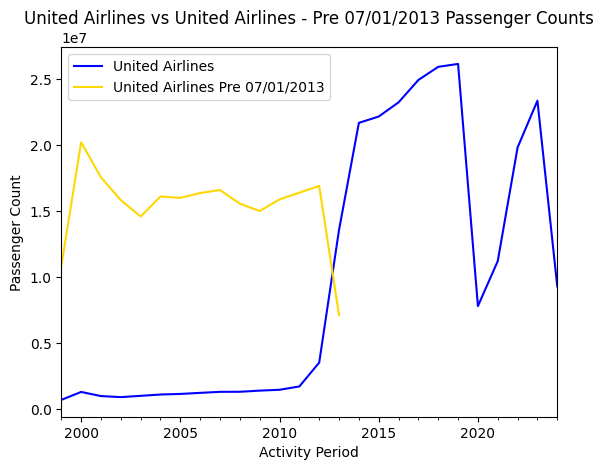

In [496]:
plt.figure()
UA_yearly['Passenger Count'].plot(label = 'United Airlines', color='blue')
UA_pre_yearly['Passenger Count'].plot(label = 'United Airlines Pre 07/01/2013', color='gold')
plt.title('United Airlines vs United Airlines - Pre 07/01/2013 Passenger Counts')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

According to the graph, United Airlines operated a small amount of flights at SFO pre 2013. Again, all of these flights were 
published under the same UA IATA code. The passenger counts of the two airlines are not duplicates of each other. So, I made the decision to replace all instances of United Airlines - pre 07/01/2013 with United Airlines. 

In [433]:
sfo_df.replace({'United Airlines - Pre 07/01/2013' : 'United Airlines'}, inplace=True)

In [434]:
UA_df2 = sfo_df[(sfo_df['Operating Airline'] == 'United Airlines') | 
        (sfo_df['Published Airline'] == 'United Airlines')]
UA2_yearly = UA_df2.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})

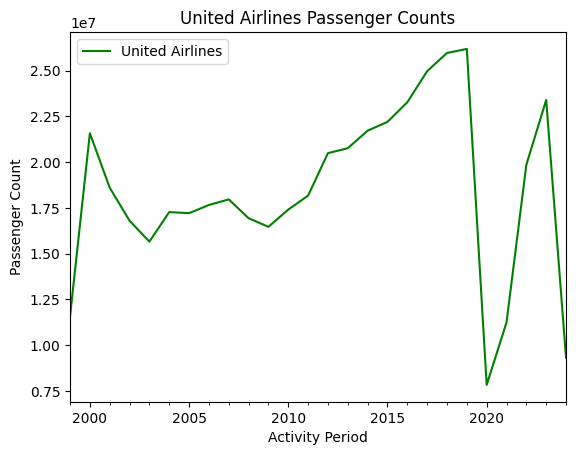

In [497]:
plt.figure()
UA2_yearly['Passenger Count'].plot(label = 'United Airlines', color='green')
plt.title('United Airlines Passenger Counts')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

This plot shows a much smoother, continuous upwards trends in passenger volume from 2009-2019. The data is now clean and can be analyzed!

## Business Analysis

The goal of my project is to be able to produce actionable insights for Airlines, the SFO Operating Team, and any other stakeholders. There are a couple of nuances to dealing with Air Traffic Passenger data. For one, passenger counts in the airline industry are 
highly seasonal. To accomodate for this, all analysis will be on a year-to-year (YTY) basis, spanning from YYYY/01/01 to YYYY/12/31. Furthermore, I will only include complete years in my analysis, which means data for 2024 will not be considered. The analysis will only consider Published Airline, as this is the airline that is predominately advertised. 

Given this framework, there are some questions that I would like to answer using this dataset. I'll use a combination of tables and graphs to visualize my answers.

1. How have SFO's transit types (enplanement/deplanement/in transit) passenger counts changed over time?
2. What airline hosts the most passengers at SFO yearly?
3. What regions are most frequently serviced, either to or from, SFO?
4. Which regional market is experiencing the greatest percent change in yearly passenger enplanements?

### Question 1: How have SFO's transit types (enplanement/deplanement/in transit) passenger counts changed over time?

In [436]:
# create dataframe for enplanements, deplanements, and in transit
# resample yearly 
# plot multiple lines
enplane_df = sfo_df[sfo_df['Activity Type Code'] == 'Enplaned']
deplane_df = sfo_df[sfo_df['Activity Type Code'] == 'Deplaned']
thru_df = sfo_df[sfo_df['Activity Type Code'] == 'Thru / Transit']

In [437]:
thru_df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
2,1999-07-01,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,1999,7
14,1999-07-01,1999/07/01,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Thru / Transit,Other,Terminal 2,D,4135,1999,7
17,1999-07-01,1999/07/01,Alaska Airlines,AS,Alaska Airlines,AS,International,Canada,Thru / Transit,Other,Terminal 2,D,277,1999,7
20,1999-07-01,1999/07/01,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Thru / Transit,Other,Terminal 2,D,1056,1999,7
71,1999-07-01,1999/07/01,Northwest Airlines (became Delta),NW,Northwest Airlines (became Delta),NW,Domestic,US,Thru / Transit,Other,Terminal 1,C,5008,1999,7


In [438]:
enplane_yearly = enplane_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})
deplane_yearly = deplane_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})
thru_yearly = thru_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})

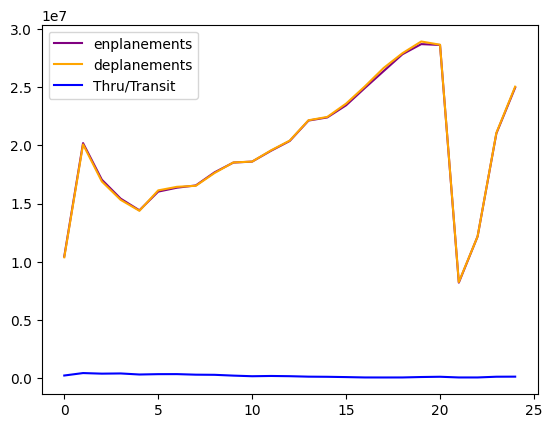

In [506]:
plt.figure()
enplane_yearly['Passenger Count'].plot(label = 'enplanements', color = 'purple')
deplane_yearly['Passenger Count'].plot(label = 'deplanements', color = 'orange')
thru_yearly['Passenger Count'].plot(label = 'Thru/Transit', color = 'blue')
plt.legend()
plt.show()

This graph shows that the number of enplanements and deplanements at SFO are very similar each year, and it is hard to read as the lines overlap for some years. A bar chart of just enplanements and deplanements would be helpful to see the trends magnified.

In [440]:
# change indices of the enplane/deplane dataframes so we have access to activity period
enplane_yearly.reset_index(inplace=True)
deplane_yearly.reset_index(inplace=True)
thru_yearly.reset_index(inplace=True)

In [441]:
enplane_yearly['Year'] = pd.DatetimeIndex(enplane_yearly['Activity Period']).year
# drop the data for 2024
enplane_yearly.drop(index=25, inplace=True)

In [442]:
deplane_yearly['Year'] = pd.DatetimeIndex(deplane_yearly['Activity Period']).year
# drop the data for 2024
deplane_yearly.drop(index=25, inplace=True)

In [443]:
thru_yearly['Year'] = pd.DatetimeIndex(thru_yearly['Activity Period']).year
# drop the data for 2024
thru_yearly.drop(index=25, inplace=True)

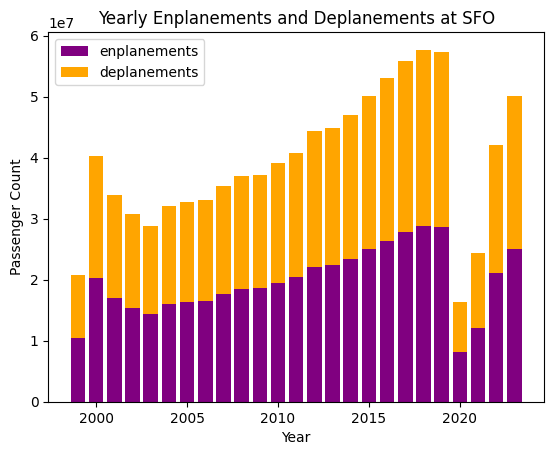

In [507]:
plt.figure()
p1 = plt.bar(enplane_yearly['Year'], enplane_yearly['Passenger Count'], color='purple')
p2 = plt.bar(deplane_yearly['Year'], deplane_yearly['Passenger Count'], color= 'orange', bottom = enplane_yearly['Passenger Count'])
plt.title('Yearly Enplanements and Deplanements at SFO')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend((p1[1], p2[1]), ('enplanements', 'deplanements'))
plt.show()

Airline Enplanements and Deplanements have increased over time, signalling the growth of SFO as a major airport and a increase in people using air transport. There is a steep decrease in 2020 due to shutdowns, but the yearly total is growing back up to its pre-Covid rate. 

### Question 2: What airline hosts the most passengers at SFO yearly?

By "hosts", I mean the largest volume of passengers across a YTY period. As such, this data is an aggregate of all flights 
published by an airline: domestic and international, enplanements and deplanements and thru/on transit. 

In [447]:
sfo_pre2024 = sfo_df[sfo_df['Year'] != 2024]

In [490]:
# summed value counts for the entire sfo_df dataframe. 
pass_year = pd.DataFrame(sfo_pre2024.groupby(by=['Published Airline', 'Year'])['Passenger Count'].sum().sort_values(ascending=False))
pass_year.head(30)

Passenger Count
Published Airline Year                 
United Airlines   2019         26179810
                  2018         25959227
                  2017         24964467
                  2023         23392197
                  2016         23267699
                  2015         22195144
                  2014         21714658
                  2000         21574331
                  2013         20757298
                  2012         20489846
                  2022         19851486
                  2001         18602923
                  2011         18170200
                  2007         17963820
                  2006         17656683
                  2010         17407102
                  2004         17269576
                  2005         17210978
                  2008         16935276
                  2002         16798888
                  2009         16464397
                  2003         15656224
                  1999         11573051
                  2021         11242398
                  2020          7831465
Alaska Airlines   2019          6675877
                  2023          5721708
                  2018          5374461
                  2022          5323934
Virgin America    2017          5263650

United Airlines has served the most yearly passengers at SFO for the entire extent of the data, 1999-2023. This is very impressive by United, but unsuprising given that SFO is considered a hub for them. Similarly SFO is considered an Alaska Airlines hub, and they serve the second most-passengers of any airline.  

It would also be interesting to see how many passengers airlines served within one specific year. 
For our first visualization, we will be seeing the airlines ranked by number of passengers served in 2023. 

In [449]:
filt = sfo_pre2024['Year'] == 2023
sfo_2023 = sfo_pre2024[filt]
pass_2023 = pd.DataFrame(sfo_2023.groupby('Published Airline')['Passenger Count'].sum().sort_values(ascending=False))
pass_2023_top10 = pass_2023.head(10)
pass_2023_top10

,Passenger Count
Published Airline,
United Airlines,23392197
Alaska Airlines,5721708
Delta Air Lines,3973069
American Airlines,3239113
Southwest Airlines,2121533
JetBlue Airways,1369534
Frontier Airlines,1137921
Air Canada,1022466
EVA Airways,594269


United is capturing the largest chunk of the market at SFO, hosting 23,392,197 passengers compared to Alaska Airlines' 5,721,708 passengers in 2023 -- United served ~4 times as many passengers as the next airline! I decided to visualize this in a bar graph as well. 

In [450]:
pass_2023_top10.reset_index(inplace=True)

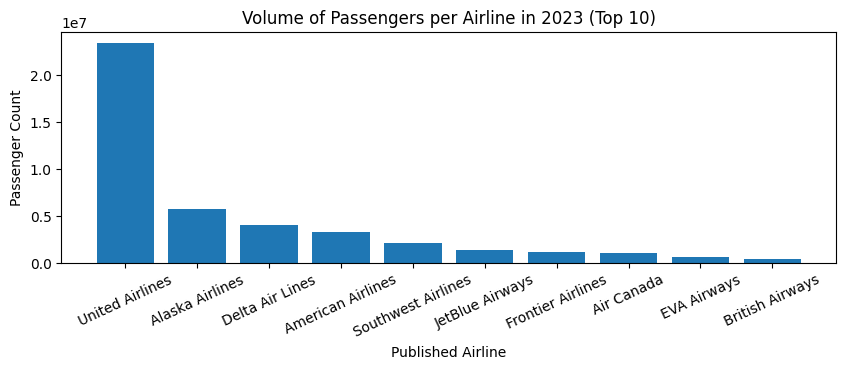

In [451]:
plt.figure(figsize = (10, 3))
plt.bar(pass_2023_top10['Published Airline'], pass_2023_top10['Passenger Count'])
plt.xticks(rotation = 25)
plt.title('Volume of Passengers per Airline in 2023 (Top 10)')
plt.ylabel('Passenger Count')
plt.xlabel('Published Airline')
plt.show()

### Question 3: What regions are most frequently serviced, either to or from, SFO?

Firstly, I wanted to determine whether more people were travelling Internationally or domestically to, from, and through SFO. The dataset also has specific regions for the international flights, so I will analyze which regions are serving the most passengers. 

In [452]:
filt = sfo_pre2024['GEO Summary'] == 'Domestic'
domestic_df = sfo_pre2024[filt]

filt = sfo_pre2024['GEO Summary'] == 'International'
international_df = sfo_pre2024[filt]

In [453]:
domestic_yearly = domestic_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})

# reset index so that we have access to Activity Period
domestic_yearly.reset_index(inplace=True)
# make Year column correspond to Activity Period
domestic_yearly['Year'] = pd.DatetimeIndex(domestic_yearly['Activity Period']).year

In [454]:
international_yearly = international_df.resample('YE', on = 'Activity Period').agg({'Passenger Count' : 'sum'})

# reset index so that we have access to Activity Period
international_yearly.reset_index(inplace=True)
# make Year column correspond to Activity Period
international_yearly['Year'] = pd.DatetimeIndex(international_yearly['Activity Period']).year

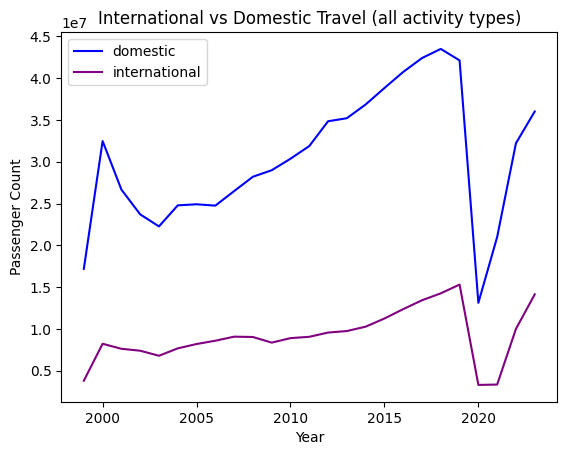

In [455]:
plt.figure()
plt.plot(domestic_yearly['Year'], domestic_yearly['Passenger Count'], label='domestic', color = 'blue')
plt.plot(international_yearly['Year'], international_yearly['Passenger Count'], label='international', color = 'purple')
plt.title('International vs Domestic Travel (all activity types)')
plt.ylabel('Passenger Count')
plt.xlabel('Year')
plt.legend()
plt.show() 

Across all years in the dataset, the majority of passengers were travelling domestically. 

Let's look at international regions and their popularity (all activity types) over time. 

In [456]:
international_df['GEO Region'].unique()

array(['Europe', 'Canada', 'Asia', 'Mexico', 'Central America',
       'Australia / Oceania', 'Middle East', 'South America'],
      dtype=object)

In [457]:
europe_df = international_df[international_df['GEO Region'] == 'Europe']
canada_df = international_df[international_df['GEO Region'] == 'Canada']
asia_df = international_df[international_df['GEO Region'] == 'Asia']
mexico_df = international_df[international_df['GEO Region'] == 'Mexico']
c_amer_df = international_df[international_df['GEO Region'] == 'Central America']
austr_df = international_df[international_df['GEO Region'] == 'Australia / Oceania']
middle_east_df = international_df[international_df['GEO Region'] == 'Middle East']
s_amer_df = international_df[international_df['GEO Region'] == 'South America']

In [458]:
europe_yearly = europe_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
europe_yearly.reset_index(inplace=True)
europe_yearly['Year'] = pd.DatetimeIndex(europe_yearly['Activity Period']).year

canada_yearly = canada_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
canada_yearly.reset_index(inplace=True)
canada_yearly['Year'] = pd.DatetimeIndex(canada_yearly['Activity Period']).year

asia_yearly = asia_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
asia_yearly.reset_index(inplace=True)
asia_yearly['Year'] = pd.DatetimeIndex(asia_yearly['Activity Period']).year

mexico_yearly = mexico_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
mexico_yearly.reset_index(inplace=True)
mexico_yearly['Year'] = pd.DatetimeIndex(mexico_yearly['Activity Period']).year

c_amer_yearly = c_amer_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
c_amer_yearly.reset_index(inplace=True)
c_amer_yearly['Year'] = pd.DatetimeIndex(c_amer_yearly['Activity Period']).year

austr_yearly = austr_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
austr_yearly.reset_index(inplace=True)
austr_yearly['Year'] = pd.DatetimeIndex(austr_yearly['Activity Period']).year

middle_east_yearly = middle_east_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
middle_east_yearly.reset_index(inplace=True)
middle_east_yearly['Year'] = pd.DatetimeIndex(middle_east_yearly['Activity Period']).year

s_amer_yearly = s_amer_df.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})
s_amer_yearly.reset_index(inplace=True)
s_amer_yearly['Year'] = pd.DatetimeIndex(s_amer_yearly['Activity Period']).year

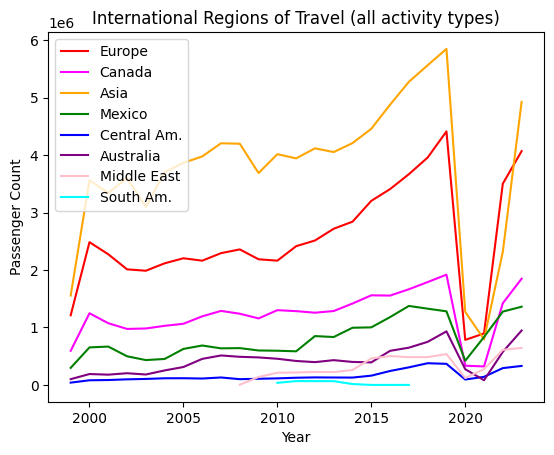

In [459]:
plt.figure()
plt.plot(europe_yearly['Year'], europe_yearly['Passenger Count'], label='Europe', color = 'red')
plt.plot(canada_yearly['Year'], canada_yearly['Passenger Count'], label='Canada', color = 'magenta')
plt.plot(asia_yearly['Year'], asia_yearly['Passenger Count'], label='Asia', color = 'orange')
plt.plot(mexico_yearly['Year'], mexico_yearly['Passenger Count'], label='Mexico', color = 'green')
plt.plot(c_amer_yearly['Year'], c_amer_yearly['Passenger Count'], label='Central Am.', color = 'blue')
plt.plot(austr_yearly['Year'], austr_yearly['Passenger Count'], label='Australia', color = 'purple')
plt.plot(middle_east_yearly['Year'], middle_east_yearly['Passenger Count'], label='Middle East', color = 'pink')
plt.plot(s_amer_yearly['Year'], s_amer_yearly['Passenger Count'], label='South Am.', color = 'cyan')
plt.title('International Regions of Travel (all activity types)')
plt.ylabel('Passenger Count')
plt.xlabel('Year')
plt.legend()
plt.show()

### Question 4: Which regional market is experiencing the greatest percent change in yearly passenger enplanements?
In other words, which geographical region is experiencing the most growth in popularity for travel from the San Francisco Bay Area. 

In [461]:
# filter for only enplanements for each region, then aggregate passenger counts for the whole year. 
europe_enplaned = europe_df[europe_df['Activity Type Code'] == 'Enplaned']
europe_yearly_enplaned = europe_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

canada_enplaned = canada_df[canada_df['Activity Type Code'] == 'Enplaned']
canada_yearly_enplaned = canada_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

asia_enplaned = asia_df[asia_df['Activity Type Code'] == 'Enplaned']
asia_yearly_enplaned = asia_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

mexico_enplaned = mexico_df[mexico_df['Activity Type Code'] == 'Enplaned']
mexico_yearly_enplaned = mexico_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

c_amer_enplaned = c_amer_df[c_amer_df['Activity Type Code'] == 'Enplaned']
c_amer_yearly_enplaned = c_amer_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

austr_enplaned = austr_df[austr_df['Activity Type Code'] == 'Enplaned']
austr_yearly_enplaned = austr_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

middle_east_enplaned = middle_east_df[middle_east_df['Activity Type Code'] == 'Enplaned']
middle_east_yearly_enplaned = middle_east_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

s_amer_enplaned = s_amer_df[s_amer_df['Activity Type Code'] == 'Enplaned']
s_amer_yearly_enplaned = s_amer_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

us_enplaned = domestic_df[domestic_df['Activity Type Code'] == 'Enplaned']
us_yearly_enplaned = us_enplaned.resample('YE', on='Activity Period').agg({'Passenger Count' : 'sum'})

In [462]:
europe_yearly_enplaned.reset_index(inplace=True)
europe_yearly_enplaned['Year'] = pd.DatetimeIndex(europe_yearly_enplaned['Activity Period']).year
europe_yearly_enplaned.set_index('Year', inplace=True)

canada_yearly_enplaned.reset_index(inplace=True)
canada_yearly_enplaned['Year'] = pd.DatetimeIndex(canada_yearly_enplaned['Activity Period']).year
canada_yearly_enplaned.set_index('Year', inplace=True)

asia_yearly_enplaned.reset_index(inplace=True)
asia_yearly_enplaned['Year'] = pd.DatetimeIndex(asia_yearly_enplaned['Activity Period']).year
asia_yearly_enplaned.set_index('Year', inplace=True)

mexico_yearly_enplaned.reset_index(inplace=True)
mexico_yearly_enplaned['Year'] = pd.DatetimeIndex(mexico_yearly_enplaned['Activity Period']).year
mexico_yearly_enplaned.set_index('Year', inplace=True)

c_amer_yearly_enplaned.reset_index(inplace=True)
c_amer_yearly_enplaned['Year'] = pd.DatetimeIndex(c_amer_yearly_enplaned['Activity Period']).year
c_amer_yearly_enplaned.set_index('Year', inplace=True)

austr_yearly_enplaned.reset_index(inplace=True)
austr_yearly_enplaned['Year'] = pd.DatetimeIndex(austr_yearly_enplaned['Activity Period']).year
austr_yearly_enplaned.set_index('Year', inplace=True)

middle_east_yearly_enplaned.reset_index(inplace=True)
middle_east_yearly_enplaned['Year'] = pd.DatetimeIndex(middle_east_yearly_enplaned['Activity Period']).year
middle_east_yearly_enplaned.set_index('Year', inplace=True)

s_amer_yearly_enplaned.reset_index(inplace=True)
s_amer_yearly_enplaned['Year'] = pd.DatetimeIndex(s_amer_yearly_enplaned['Activity Period']).year
s_amer_yearly_enplaned.set_index('Year', inplace=True)

us_yearly_enplaned.reset_index(inplace=True)
us_yearly_enplaned['Year'] = pd.DatetimeIndex(europe_yearly_enplaned['Activity Period']).year
us_yearly_enplaned.set_index('Year', inplace=True)

In [463]:
def pct_change(x,y):
    return ((y - x)/x * 100)

In [464]:
europe_change = pd.DataFrame({'Region': ['Europe', 'Europe'], 'Year' : [2022, 2023], 
                              'Passenger Count' : [europe_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                   europe_yearly_enplaned.loc[2023, 'Passenger Count']], 
                              'Percent Change' : [None, 
                                                  pct_change(europe_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                  europe_yearly_enplaned.loc[2023, 'Passenger Count'])]})

canada_change = pd.DataFrame({'Region': ['Canada', 'Canada'], 'Year' : [2022, 2023], 
                              'Passenger Count' : [canada_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                   canada_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(canada_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 canada_yearly_enplaned.loc[2023, 'Passenger Count'])]})

asia_change = pd.DataFrame({'Region': ['Asia', 'Asia'], 'Year' : [2022, 2023], 
                            'Passenger Count' : [asia_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 asia_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(asia_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 asia_yearly_enplaned.loc[2023, 'Passenger Count'])]})

mexico_change = pd.DataFrame({'Region': ['Mexico', 'Mexico'], 'Year' : [2022, 2023], 
                              'Passenger Count' : [mexico_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                   mexico_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(mexico_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 mexico_yearly_enplaned.loc[2023, 'Passenger Count'])]})

c_amer_change = pd.DataFrame({'Region': ['Central America', 'Central America'], 'Year' : [2022, 2023], 
                              'Passenger Count' : [c_amer_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                   c_amer_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(c_amer_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 c_amer_yearly_enplaned.loc[2023, 'Passenger Count'])]})

austr_change = pd.DataFrame({'Region': ['Australia / Oceania', 'Australia / Oceania'], 'Year' : [2022, 2023], 
                             'Passenger Count' : [austr_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                  austr_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(austr_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 austr_yearly_enplaned.loc[2023, 'Passenger Count'])]})

middle_east_change = pd.DataFrame({'Region': ['Middle East', 'Middle East'], 'Year' : [2022, 2023], 
                                   'Passenger Count' : [middle_east_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                        middle_east_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(middle_east_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 middle_east_yearly_enplaned.loc[2023, 'Passenger Count'])]})

us_change = pd.DataFrame({'Region': ['United States', 'United States'], 'Year' : [2022, 2023], 
                                   'Passenger Count' : [us_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                        us_yearly_enplaned.loc[2023, 'Passenger Count']], 
                             'Percent Change' : [None, 
                                                 pct_change(us_yearly_enplaned.loc[2022, 'Passenger Count'], 
                                                 us_yearly_enplaned.loc[2023, 'Passenger Count'])]})

South America has no passengers flying to South America (I would expect all flights have at least 1 stop), so no percent change is calculated. For all other regions, I will compile the percent changes into a dataframe for easier viewing. 

In [465]:
changes = pd.DataFrame({'Region' : ['Europe', 'Canada', 'Asia', 'Mexico', 'Central America',
       'Australia / Oceania', 'Middle East', 'South America', 'United States'], 
                        'Percent Change in Volume 2022-2023' : [
                            #2023 information is stored in the second row
                            europe_change.loc[1,'Percent Change'],
                            canada_change.loc[1,'Percent Change'],
                            asia_change.loc[1,'Percent Change'],
                            mexico_change.loc[1,'Percent Change'],
                            c_amer_change.loc[1,'Percent Change'],
                            austr_change.loc[1,'Percent Change'],
                            middle_east_change.loc[1,'Percent Change'],
                            None, us_change.loc[1,'Percent Change'] ]})


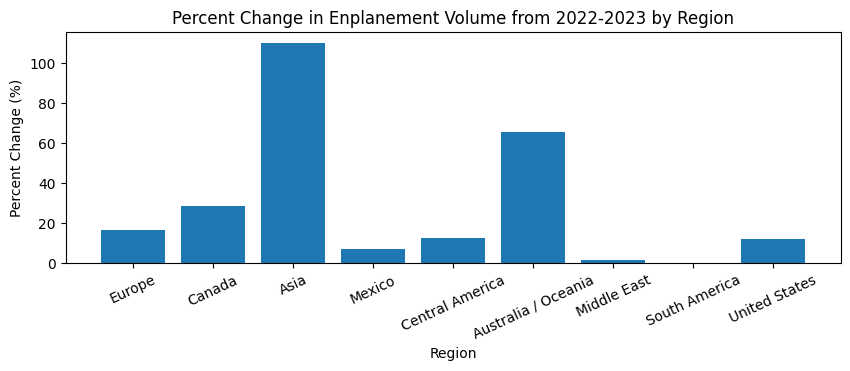

In [466]:
plt.figure(figsize = (10, 3))
plt.bar(changes['Region'], changes['Percent Change in Volume 2022-2023'])
plt.xticks(rotation = 25)
plt.title('Percent Change in Enplanement Volume from 2022-2023 by Region')
plt.ylabel('Percent Change (%)')
plt.xlabel('Region')
plt.show()

Asia saw the greatest increase in enplanement volume from 2022-2023. The aviation industry, along with many travel/hospitality 
industries, is still rebounding from COVID-19. Thus, these rapid rates of increase in enplanement volume are more likely 
attributed to a return to normal, rather than an independent surge of popularity. Nonetheless, Airlines and Airports should take notes of the trends emerging from the last years. 

Business suggestions based on this:
- I would reccomend for Airlines flying out of SFO to maintain or expand flight frequency to Asia, as the market is experiencing a profitable growth.
- Emphasize the safety of air travel as people look to travel again after the pandemic. 

## Project Review
This project was a great practice for the following Python skills:
- Exploratory Data Analysis with pandas
- Visualizations in matplotlib to explore data and trends
- Resampling time series
- Calculating percent change to identify trends
- Adapting a business mindset to make reccomendations on the data